1/ IMPORTING THE MODULE

In [154]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("the module have  been imported")

the module have  been imported


2/ LOADINNG THE DATASET

In [155]:
corona_dataset = pd.read_csv('CONVENIENT_global_confirmed_cases.csv')
corona_dataset = pd.DataFrame(corona_dataset)
corona_dataset.head()

,Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,...,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
0,Province/State,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1/23/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0
2,1/24/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1/25/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1/26/20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


3/ AGGREGATED DATAFRAME

In [156]:
corona_dataset.drop(['Winter Olympics 2022'], axis=1, inplace=True)
corona_aggregated = corona_dataset.groupby('Country/Region').sum()
corona_aggregated.head()

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.14,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Country/Region,,,,,,,,,,,,,,,,,,,,,
1/1/21,183.0,0.0,287.0,68.0,15.0,0.0,0.0,4080.0,329.0,0.0,...,53285.0,634.0,122.0,0.0,326.0,9.0,1219.0,2.0,272.0,217.0
1/1/22,23.0,0.0,386.0,0.0,805.0,0.0,0.0,20020.0,50.0,909.0,...,162572.0,911.0,127.0,0.0,193.0,14835.0,0.0,1.0,3674.0,956.0
1/1/23,57.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,91.0,53.0,0.0,0.0,204.0,0.0
1/10/21,89.0,562.0,231.0,0.0,37.0,0.0,7.0,7808.0,337.0,0.0,...,54940.0,1212.0,42.0,0.0,438.0,1.0,699.0,0.0,1161.0,978.0
1/10/22,13.0,793.0,482.0,1575.0,598.0,0.0,0.0,88352.0,126.0,0.0,...,142122.0,6757.0,389.0,0.0,0.0,14818.0,1496.0,0.0,1485.0,1082.0


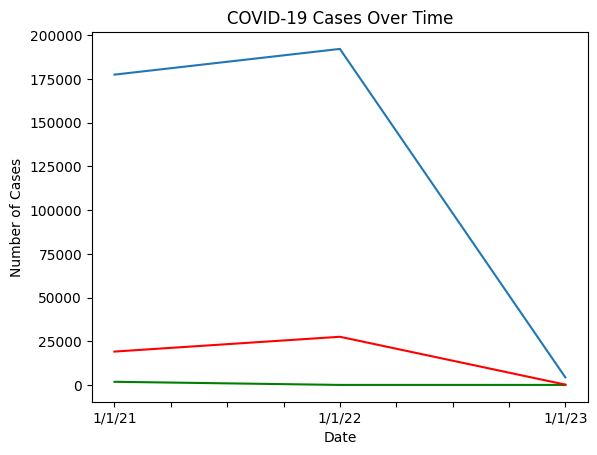

In [157]:
corona_aggregated['Belgium'][:3].plot(kind='line', color='green')
corona_aggregated['US'][:3].plot(kind='line')
corona_aggregated['India'][:3].plot(kind='line', color='red')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases Over Time')
plt.show()

In [158]:
print("US max is: ", corona_aggregated['US'].diff().max())
print("India max is: ", corona_aggregated['India'].diff().max())
print("Belgium max is: ", corona_aggregated['Belgium'].diff().max())


US max is:  1144559.0
India max is:  410601.0
Belgium max is:  131668.0


In [159]:
print("Shape: ", corona_aggregated.shape)
print("index values: ", corona_aggregated.index)
print("columns values: ", corona_aggregated.columns)

Shape:  (1143, 288)
index values:  Index(['1/1/21', '1/1/22', '1/1/23', '1/10/21', '1/10/22', '1/10/23',
       '1/11/21', '1/11/22', '1/11/23', '1/12/21',
       ...
       '9/7/20', '9/7/21', '9/7/22', '9/8/20', '9/8/21', '9/8/22', '9/9/20',
       '9/9/21', '9/9/22', 'Province/State'],
      dtype='object', name='Country/Region', length=1143)
columns values:  Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antarctica',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United Kingdom.14', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'West Bank and Gaza', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', length=288)


In [160]:
countries = list(corona_aggregated.columns)
max_infection_rates = []
for country in countries:
    # Only process columns with numeric dtype
    if pd.api.types.is_numeric_dtype(corona_aggregated[country]):
        max_infection_rates.append(corona_aggregated[country].diff().max())
    else:
        max_infection_rates.append(np.nan)  # or skip, or handle as needed
corona_aggregated.loc['max_infection_rate'] = max_infection_rates
corona_aggregated.head(10)

,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,...,United Kingdom.14,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Yemen,Zambia,Zimbabwe
Country/Region,,,,,,,,,,,,,,,,,,,,,
1/1/21,183.0,0.0,287.0,68.0,15.0,0.0,0.0,4080.0,329.0,0.0,...,53285.0,634.0,122.0,0.0,326.0,9.0,1219.0,2.0,272.0,217.0
1/1/22,23.0,0.0,386.0,0.0,805.0,0.0,0.0,20020.0,50.0,909.0,...,162572.0,911.0,127.0,0.0,193.0,14835.0,0.0,1.0,3674.0,956.0
1/1/23,57.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,91.0,53.0,0.0,0.0,204.0,0.0
1/10/21,89.0,562.0,231.0,0.0,37.0,0.0,7.0,7808.0,337.0,0.0,...,54940.0,1212.0,42.0,0.0,438.0,1.0,699.0,0.0,1161.0,978.0
1/10/22,13.0,793.0,482.0,1575.0,598.0,0.0,0.0,88352.0,126.0,0.0,...,142122.0,6757.0,389.0,0.0,0.0,14818.0,1496.0,0.0,1485.0,1082.0
1/10/23,25.0,47.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,27.0,0.0,25.0,77.0,0.0,0.0,258.0,0.0
1/11/21,49.0,376.0,225.0,0.0,61.0,0.0,0.0,8704.0,157.0,0.0,...,46169.0,715.0,39.0,0.0,373.0,1.0,771.0,1.0,868.0,820.0
1/11/22,77.0,2177.0,557.0,559.0,832.0,0.0,0.0,134439.0,243.0,2586.0,...,115280.0,7178.0,425.0,0.0,577.0,16035.0,392.0,11.0,2721.0,0.0
1/11/23,34.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,36.0,0.0,23.0,35.0,0.0,0.0,349.0,0.0


4/ NEW DATASET

In [161]:
corona_data = pd.DataFrame(corona_aggregated.loc['max_infection_rate'])
corona_data.head()

,max_infection_rate
Afghanistan,2002.0
Albania,4134.0
Algeria,2263.0
Andorra,2199.0
Angola,4979.0


5/ IMPORT WORLD HAPPINESS REPORT DATASET

In [162]:
world_happiness_report = pd.read_csv('world-happiness-report-2021.csv')
world_happiness_report.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [163]:
useless_indicators = ["Regional indicator", "Standard error of ladder score","upperwhisker","lowerwhisker","Ladder score in Dystopia", "Explained by: Log GDP per capita", "Explained by: Social support", "Explained by: Healthy life expectancy", "Explained by: Generosity", "Explained by: Freedom to make life choices", "Explained by: Perceptions of corruption", "Dystopia + residual", "Generosity", "Perceptions of corruption", "Ladder score"]
world_happiness_report.drop(useless_indicators, axis=1, inplace=True, errors='ignore')
world_happiness_report.head()

,Country name,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
0,Finland,10.775,0.954,72.0,0.949
1,Denmark,10.933,0.954,72.7,0.946
2,Switzerland,11.117,0.942,74.4,0.919
3,Iceland,10.878,0.983,73.0,0.955
4,Netherlands,10.932,0.942,72.4,0.913


In [164]:

world_happiness_report.set_index('Country name', inplace=True)
world_happiness_report.head()

,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Country name,,,,
Finland,10.775,0.954,72.0,0.949
Denmark,10.933,0.954,72.7,0.946
Switzerland,11.117,0.942,74.4,0.919
Iceland,10.878,0.983,73.0,0.955
Netherlands,10.932,0.942,72.4,0.913


6/ JOIN THE DATA

In [165]:
data = corona_data.join(world_happiness_report, how='inner')
data.head()

,max_infection_rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
Afghanistan,2002.0,7.695,0.463,52.493,0.382
Albania,4134.0,9.520,0.697,68.999,0.785
Algeria,2263.0,9.342,0.802,66.005,0.480
Argentina,126567.0,9.962,0.898,69.000,0.828
Armenia,4198.0,9.487,0.799,67.055,0.825


7/ CORRELATION MATRIX

In [166]:
data.corr()

,max_infection_rate,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rate,1.000000,0.277008,0.174556,0.301401,-0.008249
Logged GDP per capita,0.277008,1.000000,0.798452,0.872090,0.456510
Social support,0.174556,0.798452,1.000000,0.748850,0.486266
Healthy life expectancy,0.301401,0.872090,0.748850,1.000000,0.493911
Freedom to make life choices,-0.008249,0.456510,0.486266,0.493911,1.000000


8/ CORRELATION WITH GDP PER CAPITA

Text(0.5, 1.0, 'GDP per capita vs Max Infection Rate')

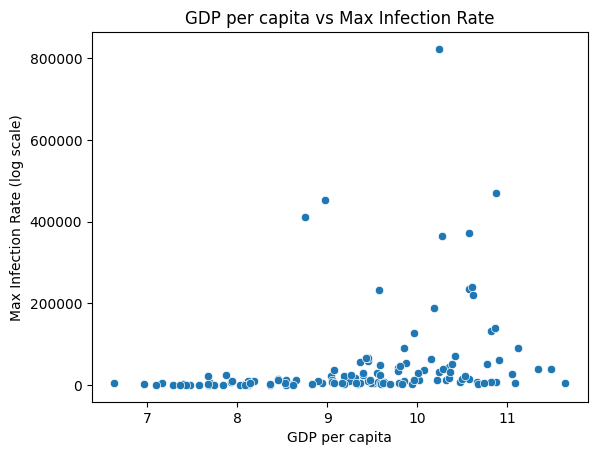

In [167]:
x =  data["Logged GDP per capita"]
data['max_infection_rate'] = pd.to_numeric(data['max_infection_rate'], errors='coerce')
y = data["max_infection_rate"]
y = np.log(y + 1)  # Apply log transformation to handle skewness and avoid log(0)
sns.scatterplot(data=data, x="Logged GDP per capita", y="max_infection_rate")
plt.xlabel('GDP per capita')
plt.ylabel('Max Infection Rate (log scale)')
plt.title('GDP per capita vs Max Infection Rate')

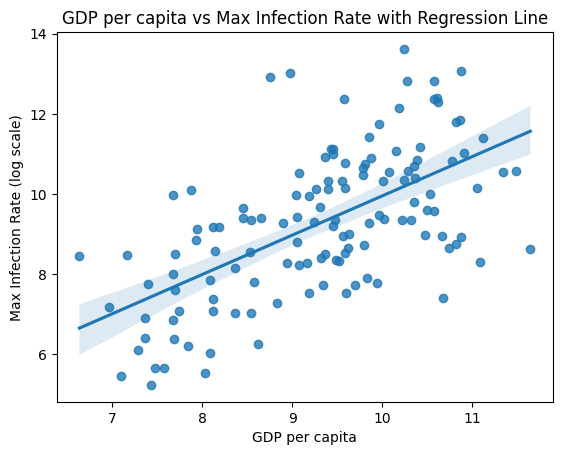

In [168]:
sns.regplot(x=x, y=y, scatter=True, fit_reg=True)
plt.xlabel('GDP per capita')
plt.ylabel('Max Infection Rate (log scale)')
plt.title('GDP per capita vs Max Infection Rate with Regression Line')
plt.show()

9/ CORRELATION WITH HEALTH SUPPORT

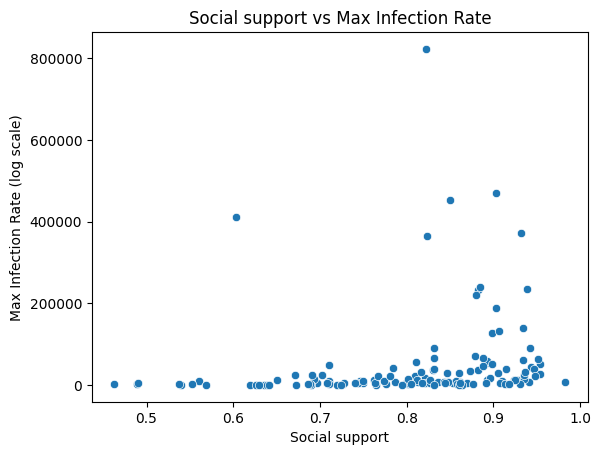

In [169]:
x = data['Social support']
sns.scatterplot(data=data, x='Social support', y='max_infection_rate')
plt.xlabel('Social support')
plt.ylabel('Max Infection Rate (log scale)')
plt.title('Social support vs Max Infection Rate')
plt.show()

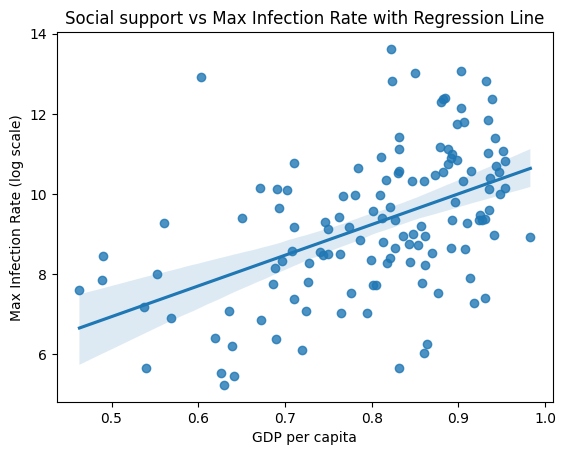

In [170]:
sns.regplot(x=x, y=y, scatter=True, fit_reg=True)
plt.xlabel('GDP per capita')   
plt.ylabel('Max Infection Rate (log scale)')
plt.title('Social support vs Max Infection Rate with Regression Line')
plt.show()

10/ CORRELATION WITH LIFE EXPECTANCY

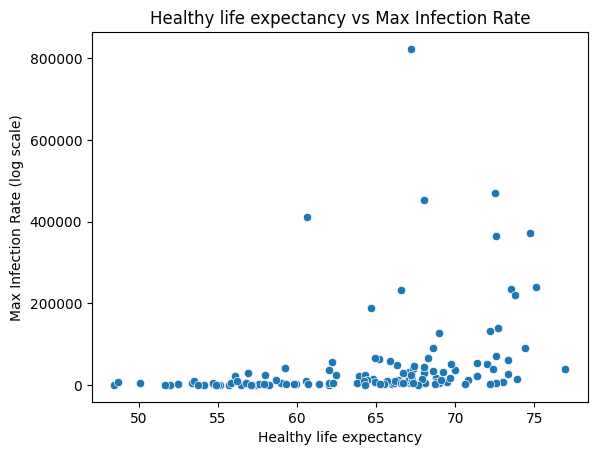

In [171]:
x = data['Healthy life expectancy']
sns.scatterplot(data=data, x='Healthy life expectancy', y='max_infection_rate')
plt.xlabel('Healthy life expectancy')
plt.ylabel('Max Infection Rate (log scale)')
plt.title('Healthy life expectancy vs Max Infection Rate')
plt.show()

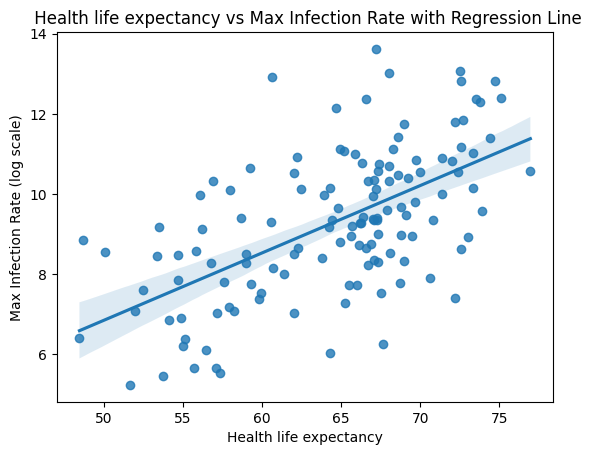

In [172]:
sns.regplot(x=x, y=y, scatter=True, fit_reg=True)
plt.xlabel('Health life expectancy')
plt.ylabel('Max Infection Rate (log scale)')
plt.title(' Health life expectancy vs Max Infection Rate with Regression Line')
plt.show()

11/ FREEDOM TO MAKE LIFE CHOICE VS MAX INFECTION RATE

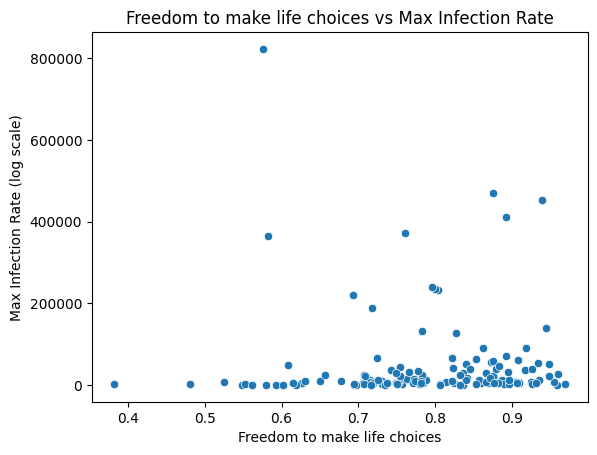

In [173]:
x = data['Freedom to make life choices']
sns.scatterplot(data=data, x='Freedom to make life choices', y='max_infection_rate')
plt.xlabel('Freedom to make life choices')
plt.ylabel('Max Infection Rate (log scale)')
plt.title('Freedom to make life choices vs Max Infection Rate')
plt.show()

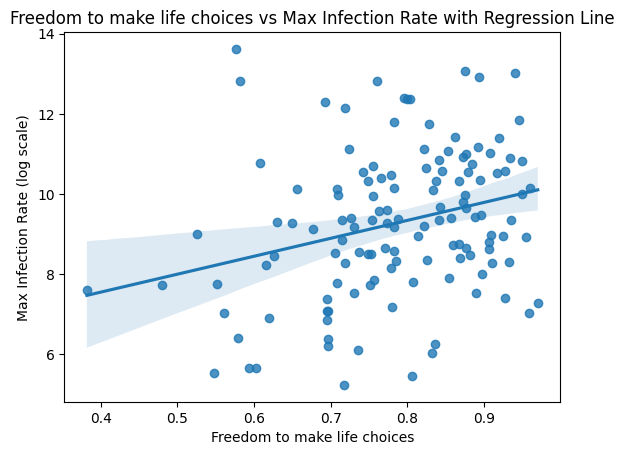

In [174]:
sns.regplot(x=x, y=y, scatter=True, fit_reg=True)
plt.xlabel('Freedom to make life choices')
plt.ylabel('Max Infection Rate (log scale)')
plt.title('Freedom to make life choices vs Max Infection Rate with Regression Line')
plt.show()